In [274]:
using JLD2, LinearAlgebra, PyPlot, Tullio, Statistics

In [275]:
tt = ["A", "C", "F", "I", "L", "M", "V", "W", "Y", "P", "H", "K", "R", "D", "E", "N", "Q", "S", "T", "G"];

In [276]:
function int_matr(A; tt = tt, titolo = false, nametitle = "Interaction Matrix")
    matshow(A)
    xticks(0:19,tt)
    yticks(0:19,tt)
    tick_params(axis="both", which="both", bottom=false, top=false)
    if titolo == true
        title(nametitle)
    end        
    colorbar()
end

function zerosumgaug(m; mj = false)
    E_col = mean(m, dims = 2)
    E_row = mean(m, dims = 1)
    E_tot = mean(m)
    if mj == true
        res = -m .+ E_col .+ E_row .- E_tot;
    else
        res = m .- E_col .- E_row .+ E_tot
    end
    return res
end

zerosumgaug (generic function with 1 method)

## Miyazawa Jernigan

In [277]:
@load "../../InteractionMatrix.jld2"

7-element Vector{Symbol}:
 :E
 :E1
 :E2
 :order_MJ
 :order_Martin
 :E1_natural
 :E1_martin

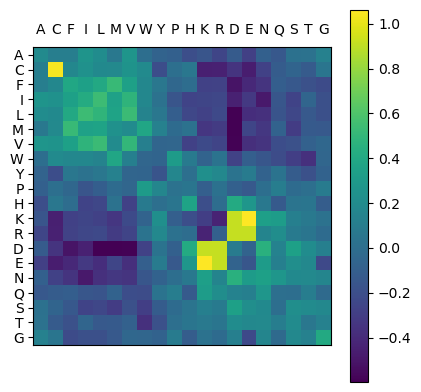

In [278]:
EE = zerosumgaug(E1_martin, mj = true)
int_matr(EE, nametitle= "total martin");


[0.343, 0.183, 0.097, 0.078]


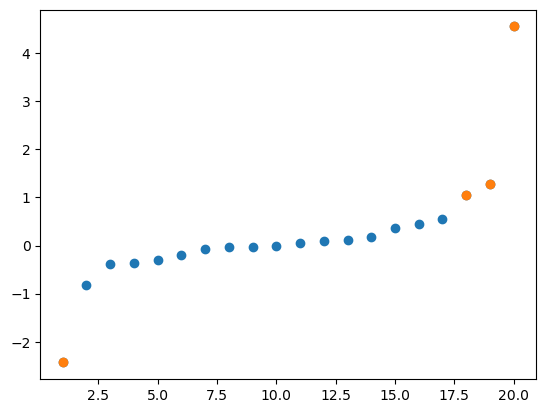

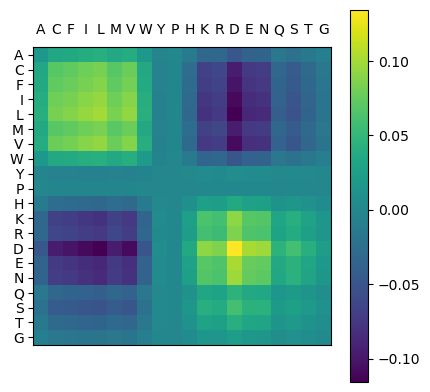

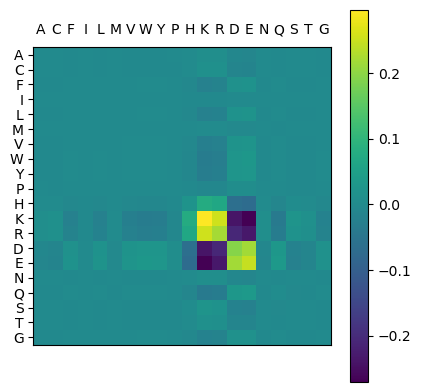

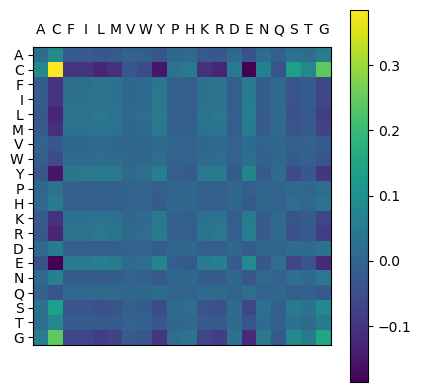

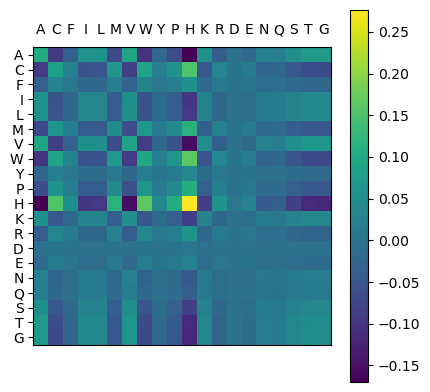

In [279]:
#spectral analysis of mj matrix
l, vv = eigen(EE)
scatter(1:length(l), l);
scatter(sortperm(abs.(l), rev=true)[1:4], l[sortperm(abs.(l), rev=true)][1:4]);
println(round.(abs.(l[sortperm(abs.(l), rev=true)][1:4]) ./ sum(abs.(l)), digits = 3))
for i in 1:4
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]]); 
end

## HopfieldDCA reconstructing J like martin H = 20

In [385]:
q = 20; n_eig = 6;

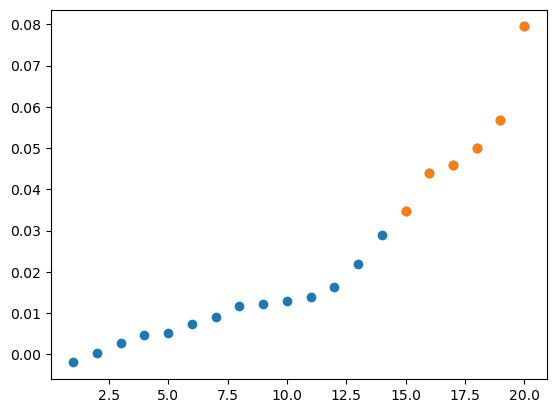

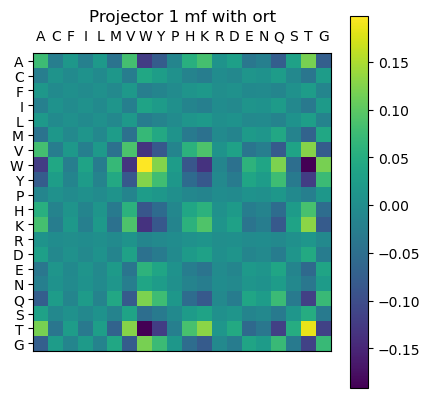

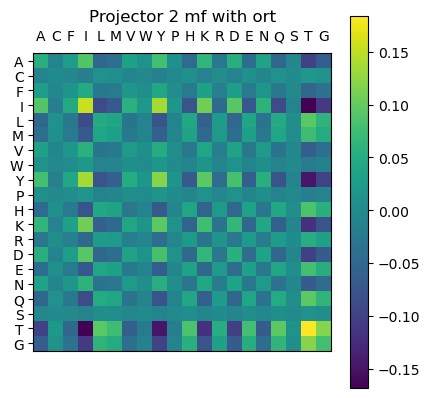

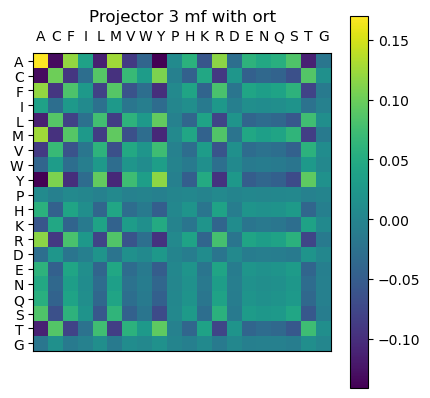

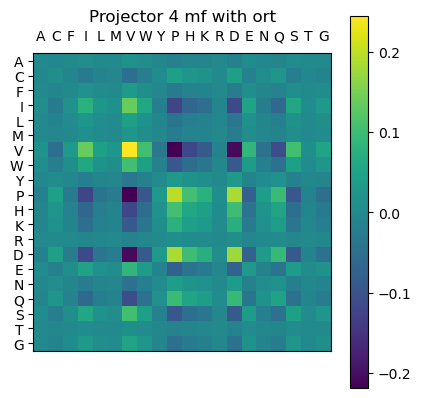

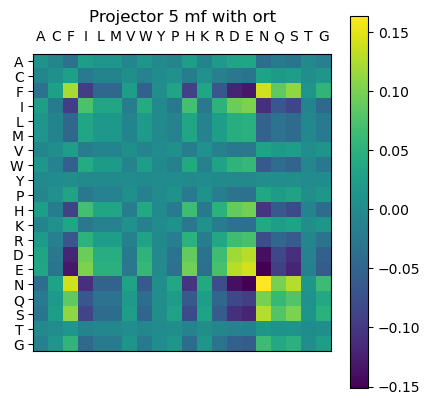

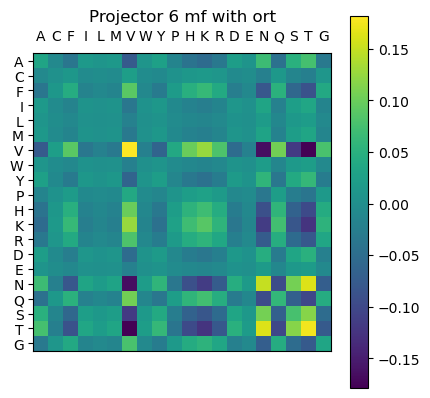

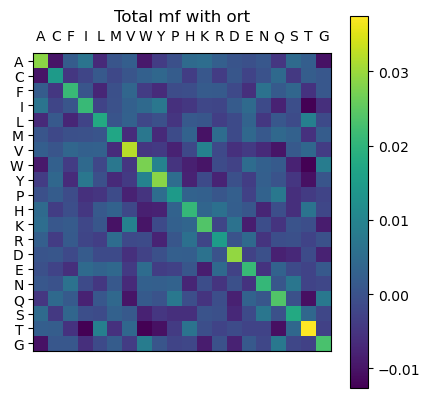

PyObject <matplotlib.colorbar.Colorbar object at 0x7f214e9626d0>

In [386]:
#multifamily
@load "../../multi_fam/orttrue_H21η0.01λ0.001/mf_pars35_H21η0.01λ0.001T90.jld2"
m1 = m ;
Nf = length(m1.Ks);
H = size(m1.V,2)
JJ = [@tullio J[i,j,a,b] := m1.Ks[f][i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) for f in 1:Nf]
J0 = [mean(mean(JJ[f], dims = 3), dims=4) for f in 1:Nf]  
JJ_zs = [JJ[f] .- mean(JJ[f], dims = 3) .- mean(JJ[f], dims = 4) .+ J0[f] for f in 1:Nf]
e_all = mean([dropdims(dropdims(mean(mean(JJ_zs[f], dims = 1), dims=2),dims=1),dims=1) for f in 1:Nf])[1:q,1:q]

l, vv = eigen(e_all)
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) mf with ort"); 
end
int_matr(e_all, titolo = true, nametitle = "Total mf with ort")



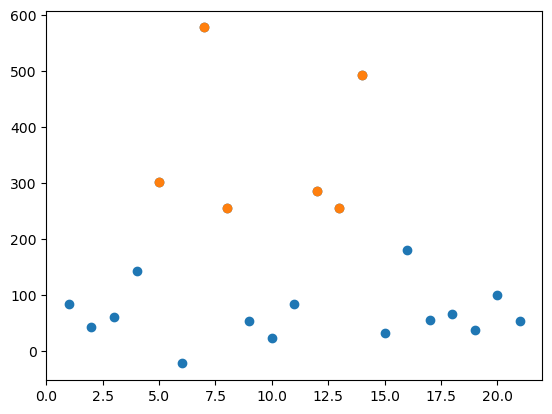

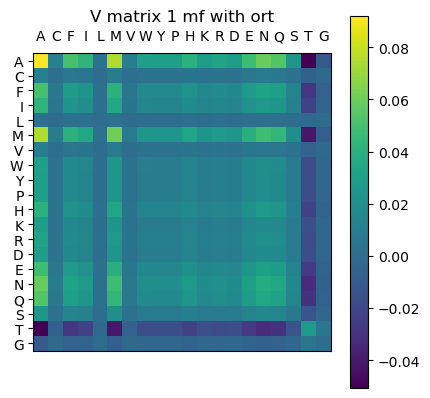

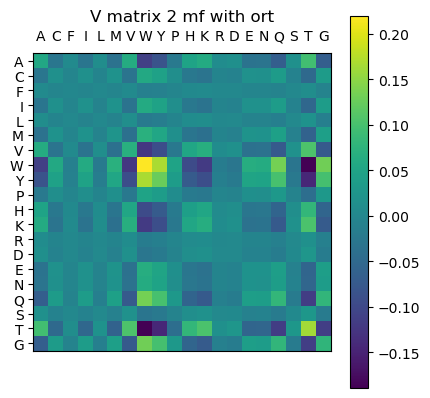

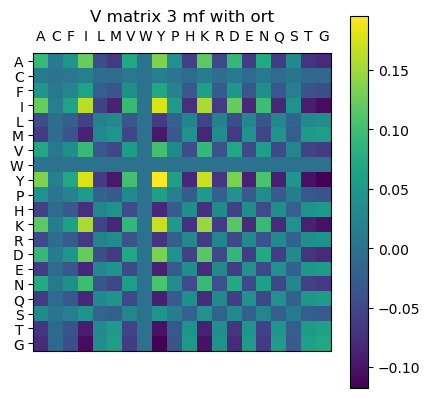

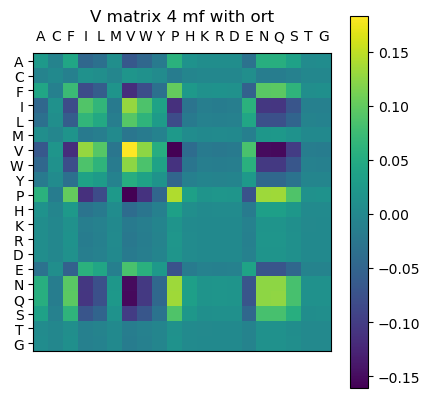

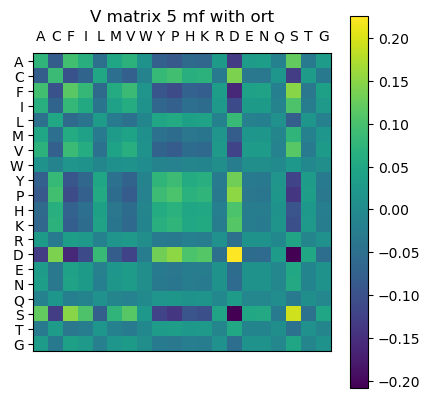

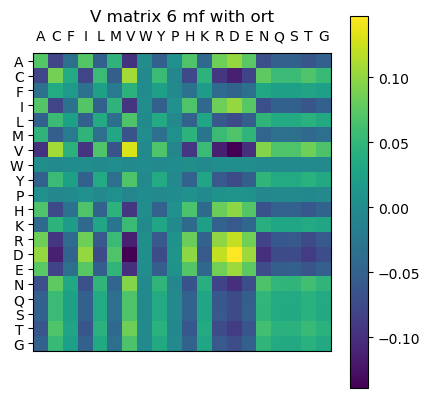

In [387]:
@load "../../multi_fam/orttrue_H21η0.01λ0.001/mf_pars35_H21η0.01λ0.001T90.jld2"
m1 = m ;
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
llh = mean([@tullio lam[h] := m1.Ks[f][i,j,h]*(j!=i) for f in 1:Nf]);

close("all"); scatter(1:length(llh), llh)
scatter(sortperm(abs.(llh), rev=true)[1:n_eig], llh[sortperm(abs.(llh), rev=true)][1:n_eig])
ex_var = round.(abs.(llh[sortperm(abs.(llh), rev=true)][1:n_eig]) ./ sum(abs.(llh)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[1:q,1:q,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) mf with ort"); 
end


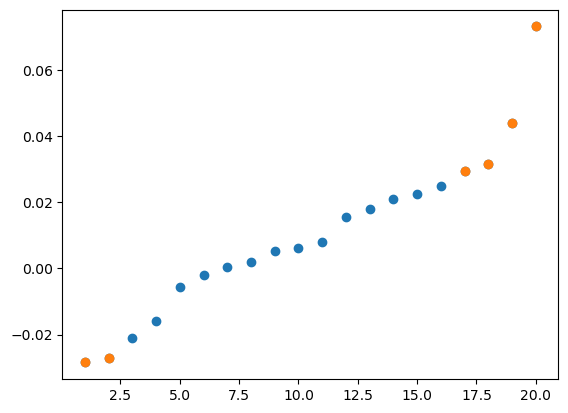

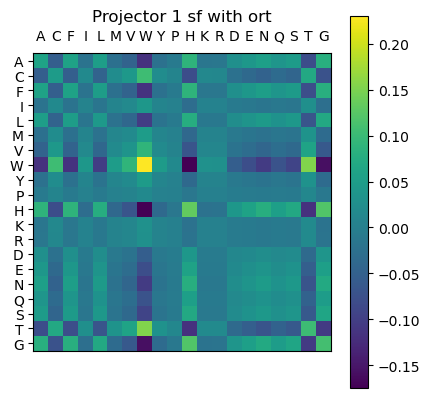

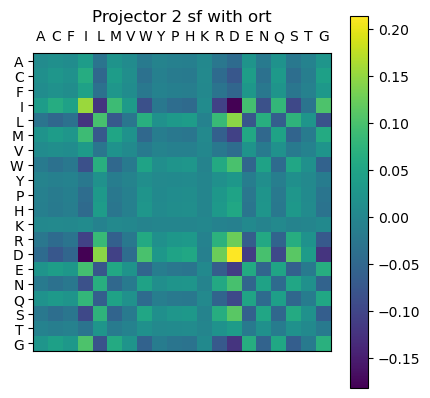

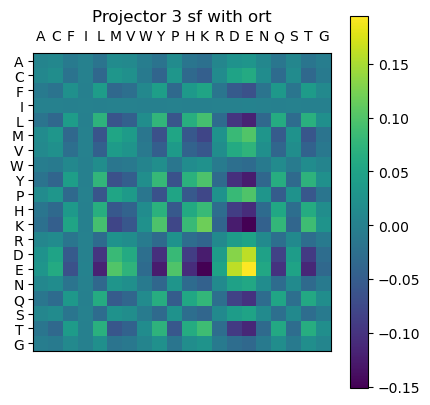

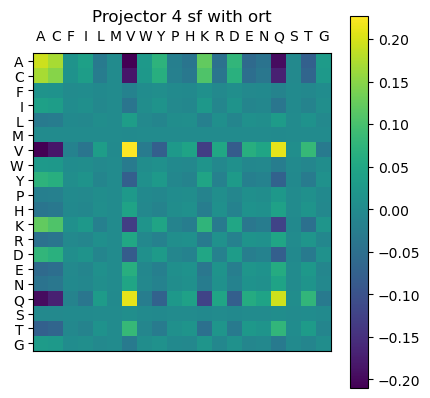

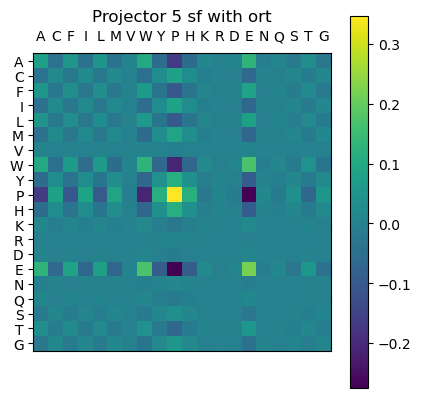

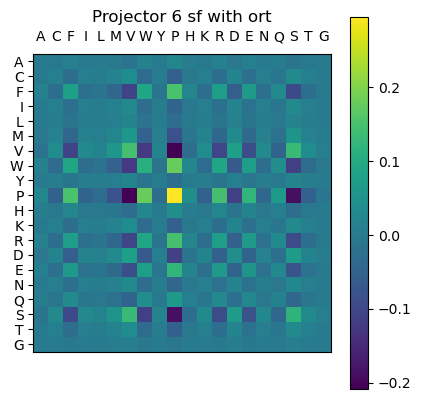

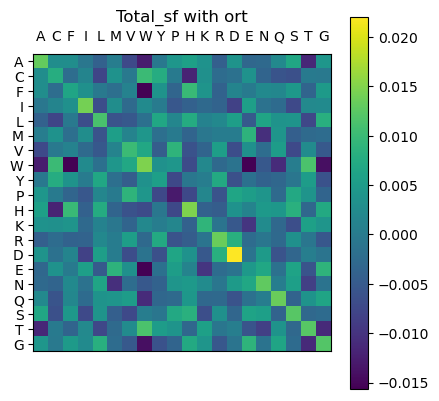

PyObject <matplotlib.colorbar.Colorbar object at 0x7f214fedaf40>

In [388]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m1 = m ;
#single family
Nf = length(m1.K);
H = size(m1.V,2)

@tullio JJ[i,j,a,b] := m1.K[i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) 
J0 = mean(mean(JJ, dims = 3), dims=4)  
JJ_zs = JJ .- mean(JJ, dims = 3) .- mean(JJ, dims = 4) .+ J0
e_all = dropdims(dropdims(mean(mean(JJ_zs, dims = 1), dims=2),dims=1),dims=1)[1:q,1:q]

l, vv = eigen(e_all)
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[:,sortperm(abs.(l), rev=true)[i]]' .* vv[:,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) sf with ort"); 
end
int_matr(e_all, titolo = true, nametitle = "Total_sf with ort")

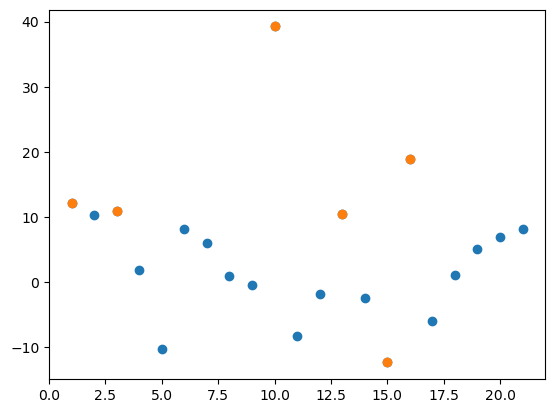

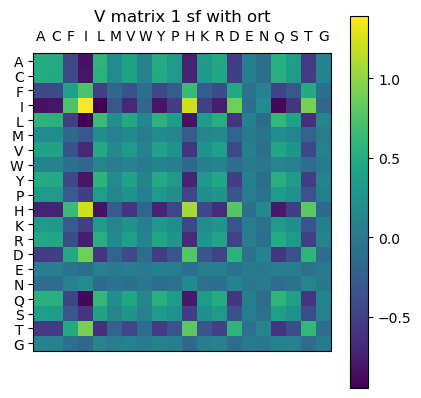

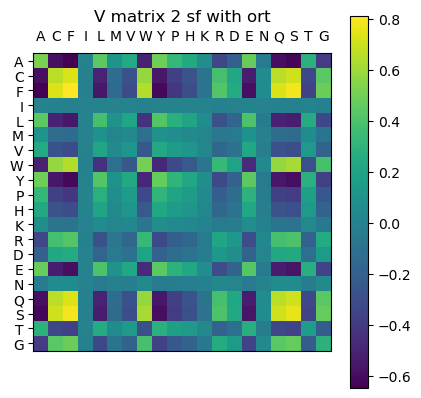

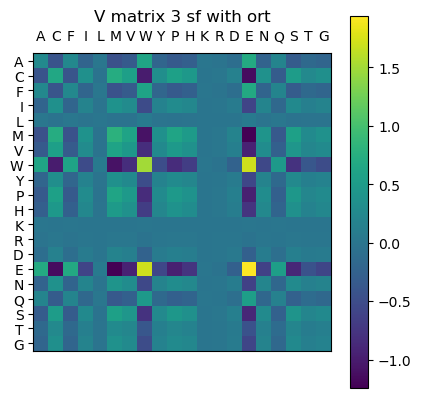

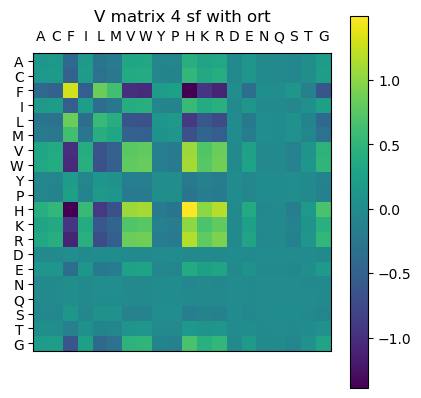

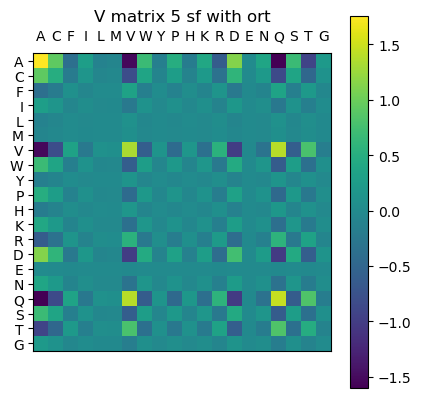

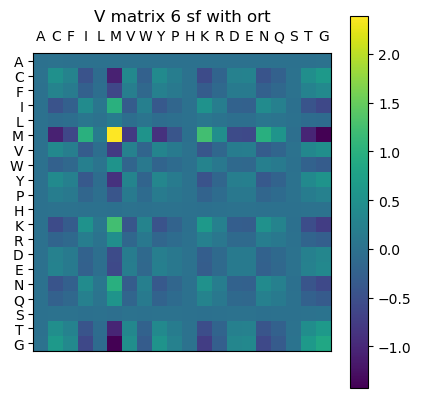

In [391]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m1 = m ;
#single family
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
@tullio ll[h] := m1.K[i,j,h]*(j!=i);
close("all"); scatter(1:length(ll), ll)
scatter(sortperm(abs.(ll), rev=true)[1:n_eig], ll[sortperm(abs.(ll), rev=true)][1:n_eig])
ex_var = round.(abs.(ll[sortperm(abs.(ll), rev=true)][1:n_eig]) ./ sum(abs.(ll)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[1:q,1:q,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) sf with ort"); 
end

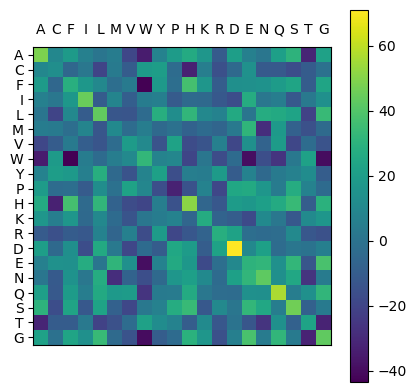

PyObject <matplotlib.colorbar.Colorbar object at 0x7f212d3c56a0>

In [395]:
@tullio e[a,b] := ll[h] * VV[a,b,h]
int_matr(e[1:q, 1:q])

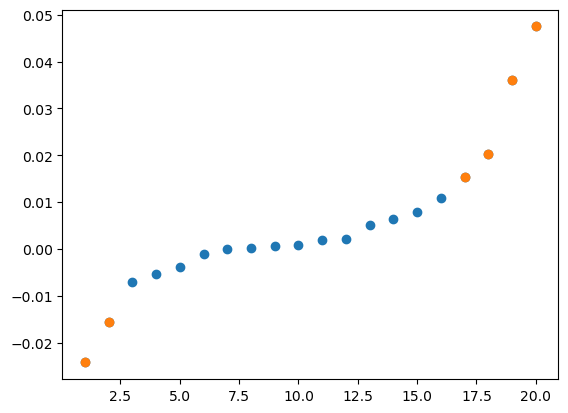

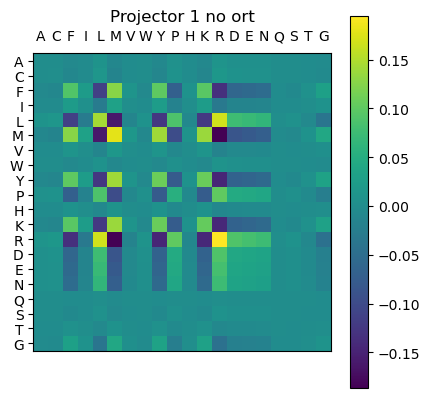

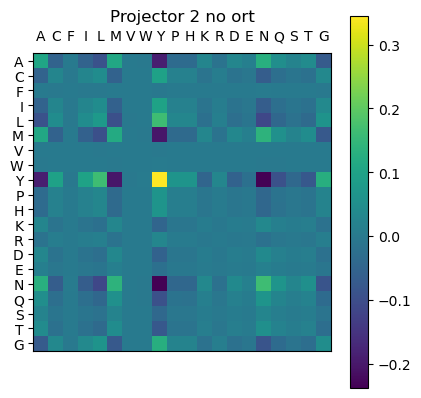

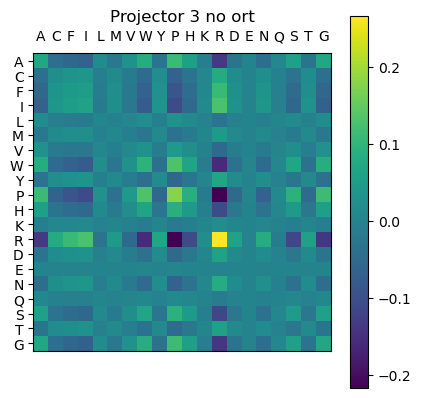

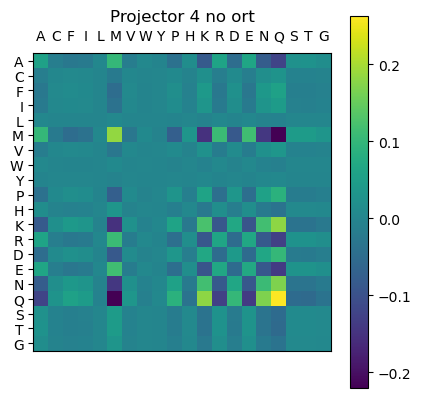

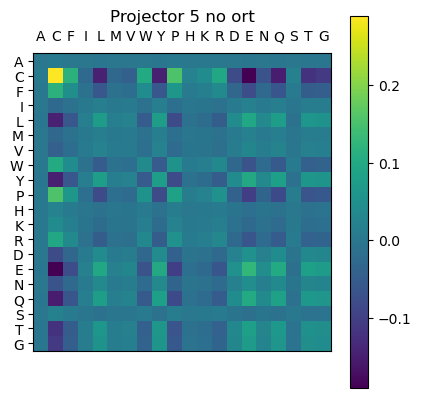

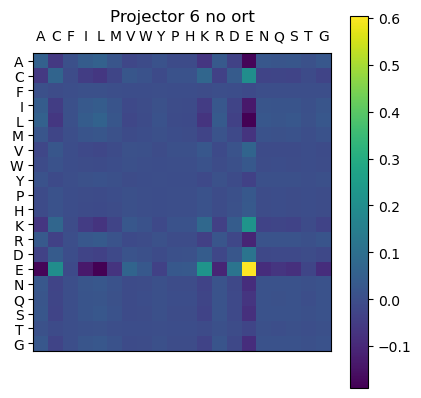

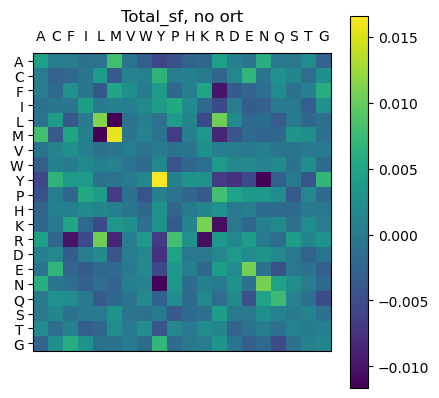

PyObject <matplotlib.colorbar.Colorbar object at 0x7f214c794550>

In [396]:
@load "../../DataAttentionDCA/data/PF00014/ortfalse_parsH21η0.5λ0.001T200.jld2"
m1 = m ;
#single family
Nf = length(m1.K);
H = size(m1.V,2)
@tullio JJ[i,j,a,b] := m1.K[i,j,h]*m1.V[a,h]*m1.V[b,h]*(j!=i) 
J0 = mean(mean(JJ, dims = 3), dims=4)  
JJ_zs = JJ .- mean(JJ, dims = 3) .- mean(JJ, dims = 4) .+ J0
e_all = dropdims(dropdims(mean(mean(JJ_zs, dims = 1), dims=2),dims=1),dims=1)[1:q,1:q]
l, vv = eigen(e_all)
close("all"); scatter(1:length(l), l)
scatter(sortperm(abs.(l), rev=true)[1:n_eig], l[sortperm(abs.(l), rev=true)][1:n_eig])
ex_var = round.(abs.(l[sortperm(abs.(l), rev=true)][1:n_eig]) ./ sum(abs.(l)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(vv[1:q,sortperm(abs.(l), rev=true)[i]]' .* vv[1:q,sortperm(abs.(l), rev=true)[i]], 
        titolo = true, nametitle = "Projector $(i) no ort"); 
end
int_matr(e_all, titolo = true, nametitle = "Total_sf, no ort")



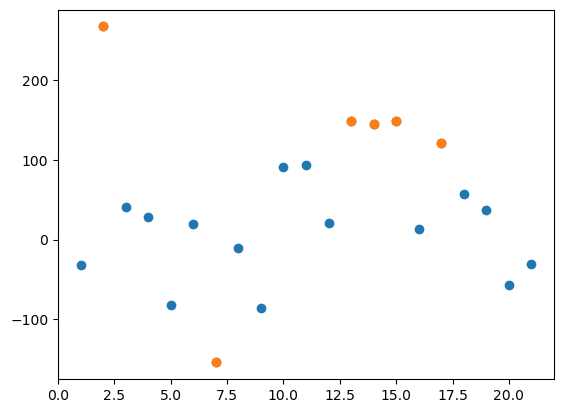

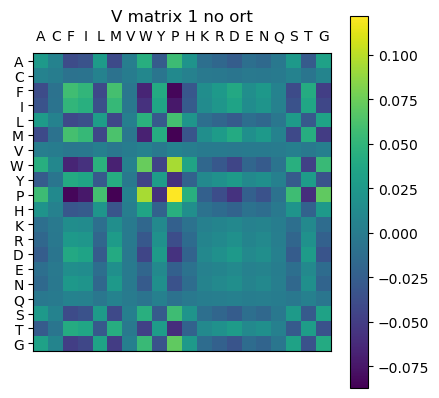

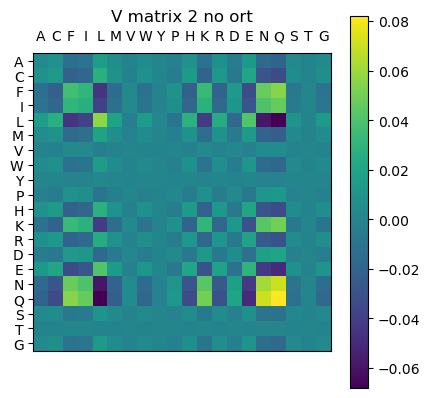

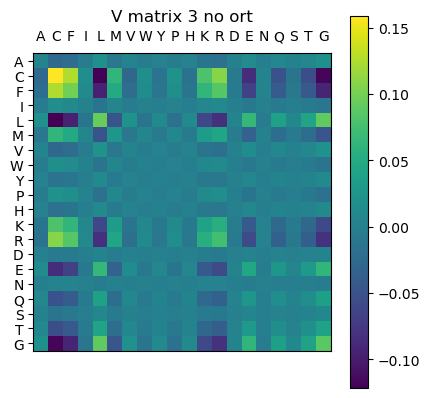

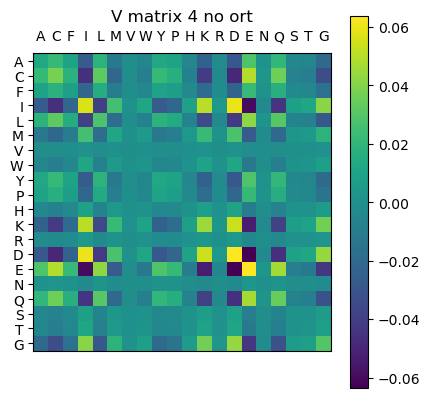

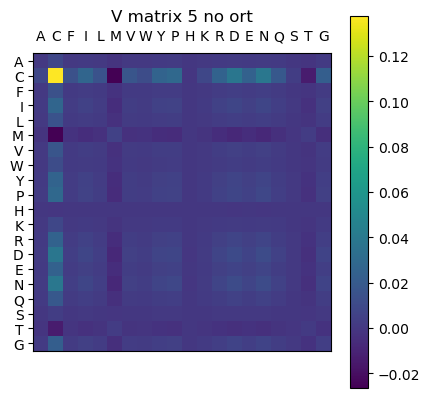

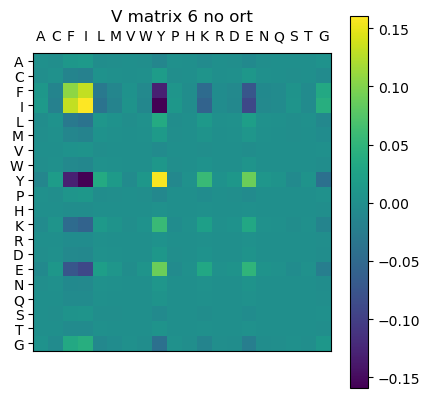

In [381]:
@load "../../DataAttentionDCA/data/PF00014/ortfalse_parsH21η0.5λ0.001T200.jld2"
m1 = m ;
#single family
@tullio VV[a, b, h] := m1.V[a,h]*m1.V[b,h]
@tullio ll[h] := m1.K[i,j,h]*(j!=i);

close("all"); scatter(1:length(ll), ll)
scatter(sortperm(abs.(ll), rev=true)[1:n_eig], ll[sortperm(abs.(ll), rev=true)][1:n_eig])
ex_var = round.(abs.(ll[sortperm(abs.(ll), rev=true)][1:n_eig]) ./ sum(abs.(ll)), digits = 3) 
#plot(1:n_eig, cumsum(ex_var), label = "Explained Variance")
#plt.legend()
for i in 1:n_eig
    int_matr(VV[1:q,1:q,sortperm(abs.(llh), rev=true)[i]],
        titolo = true, nametitle = "V matrix $(i) no ort"); 
end

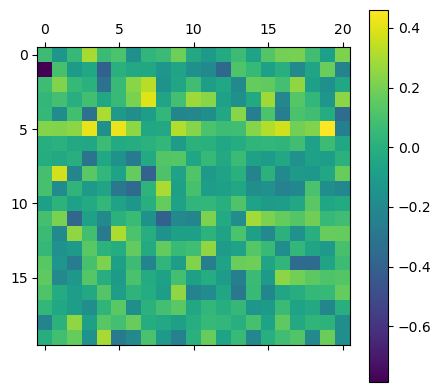

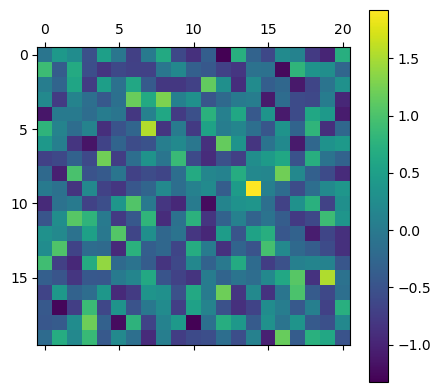

PyObject <matplotlib.colorbar.Colorbar object at 0x7f212a10d8e0>

In [402]:
@load "../../DataAttentionDCA/data/PF00014/orttrue_parsH21η0.05λ0.001T60.jld2"
m2 = m ;
matshow(m1.V[1:q,:])
colorbar()
matshow(m2.V[1:q,:])
colorbar()

In [407]:

[m2.V[:,h]'*m2.V[:,h1] for h in 1:21, h1 in 1:21]

21×21 Matrix{Float32}:
  7.49782      0.0639424   -0.0254353   …   0.00877876   -0.00471296
  0.0639424    6.86082      0.0182762      -0.00884895   -0.023905
 -0.0254353    0.0182762    7.8524          0.0348378     0.00185025
  0.0409889   -0.0437339   -0.0106052      -0.00772287    0.0427591
 -0.0975724    0.012952    -0.00471044     -0.0111747     0.0263737
 -0.0261436   -0.0644415   -0.0381879   …   0.0491084    -0.057343
  0.00837012  -0.0273337    0.036533       -0.00740307    0.0301398
  0.0299786    0.00801725  -0.0720432       0.000281003  -0.0704939
 -0.00678464   0.0450626   -0.0245692      -0.0198294     0.0166537
  0.0297686    0.0737131   -0.0183714       0.00202789   -0.00652052
  0.0441286   -0.00250746  -0.0148201   …   0.060403      0.0251462
  0.0348119    0.00282673   0.00177217     -0.0917951     0.00208802
 -0.0243648    0.00303859   0.0493583       0.056085      0.016991
  0.013148    -0.0216349    0.0147087      -0.00388733   -0.0292225
  0.00855031  -0.0559832

In [406]:
[m1.V[:,h]'*m1.V[:,h1] for h in 1:21, h1 in 1:21]

21×21 Matrix{Float32}:
  0.880971    -0.073333     -0.0382699   …  -0.0588464   0.228929
 -0.073333     0.514808     -0.076911        0.10671    -0.0124434
 -0.0382699   -0.076911      0.561218        0.175493   -0.210416
  0.177922     0.110114      0.0369856       0.203452    0.225211
  0.250525    -0.184408      0.0173332      -0.0985756  -0.0430149
  0.0310515    0.107904      0.199106    …   0.20011     0.0684843
  0.0949205    0.240139     -0.00734638      0.152093    0.179516
 -0.0140721   -0.0278792     0.220295       -0.0968863   0.017938
  0.0816028   -0.175016      0.0335212      -0.202484   -0.0523002
  0.143221    -0.0137477     0.0626079       0.0472201   0.162176
  0.194514     0.0954729     0.0437843   …  -0.0379355   0.0511811
  0.120278     0.0751021     0.0504766       0.035828    0.0650679
  0.070397     0.0536716     0.188993       -0.0161601   0.0443736
 -0.170745    -0.076057      0.137043        0.0599604  -0.213497
  0.00791949   0.102836     -0.109326        0